In [12]:
library(data.table)
library(ggplot2)
library(truncnorm)

In [1]:
getwd()

[1] "/raid/CLOUD/REHMS-HOEPLER/application"

In [3]:
data = fread("../data/real_data/Daten_Wismut_M0M1aM1bM2M2_ExpertM3M4.csv")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



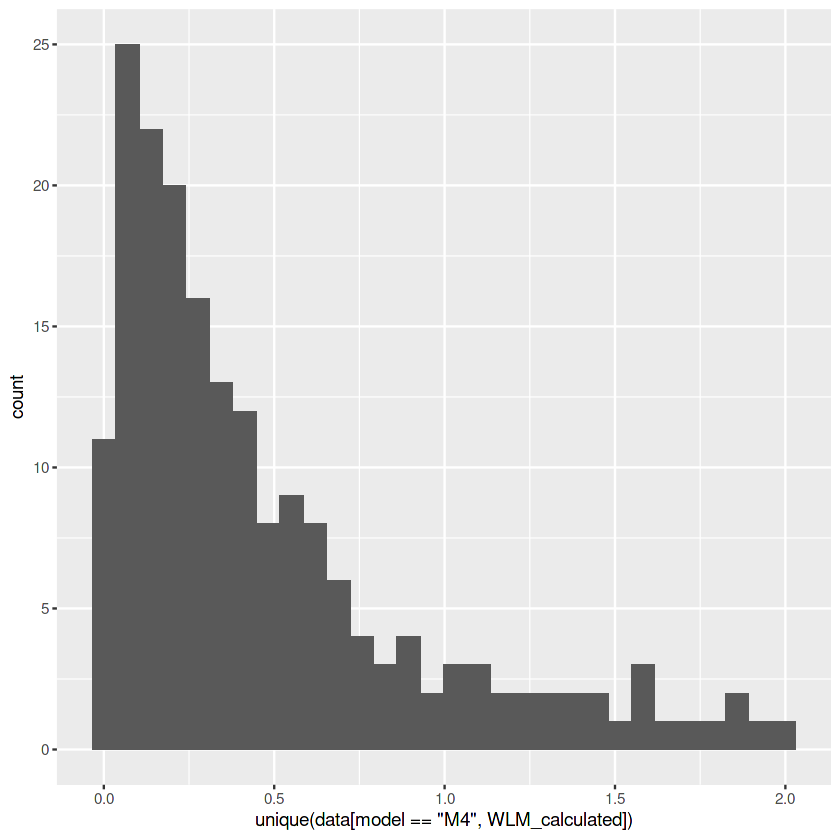

In [4]:
ggplot()+
geom_histogram(aes(unique(data[model == "M4", WLM_calculated])))

In [16]:

fit_lognorm_to_data <- function(data, plot = TRUE) {
  
  # Define the negative log-likelihood function for the log-normal distribution
  log_likelihood <- function(params, data) {
    mu_log <- params[1]
    sigma_log <- params[2]
    -sum(dlnorm(data, meanlog = mu_log, sdlog = sigma_log, log = TRUE))
  }
  
  # Initial parameter estimates
  init_params <- c(mean(log(data)), sd(log(data)))
  
  # Perform the optimization to fit the log-normal distribution
  fit <- optim(init_params, log_likelihood, data = data, method = "L-BFGS-B",
               lower = c(-10, 0.0001), upper = c(100, 100))
  
  mu_log <- fit$par[1]
  sigma_log <- fit$par[2]
  
  # Plot the results if requested
  g <- NULL
  if(plot) {
    g <- ggplot() +
      geom_histogram(aes(x = data, y = ..density..), bins = 50, fill = "steelblue1", alpha = 0.6) +
      stat_function(fun = function(x) dlnorm(x, meanlog = mu_log, sdlog = sigma_log),
                    color = "steelblue", size = 1) +
      labs(x = "Value", y = "Density") +
      ggtitle("Fit of Log-normal Distribution to Data") +
      theme_minimal()
  }
  
  return(list(mu = mu_log, sd = sigma_log, plot = g))
}


fit_truncnorm_to_data <- function(data, plot = TRUE) {
  
  # Define the negative log-likelihood function for the truncated normal distribution
  log_likelihood_truncnorm <- function(params, data) {
    mu <- params[1]
    sigma <- params[2]
    a <- 0
    b <- Inf
    -sum(log(dtruncnorm(data, a = a, b = b, mean = mu, sd = sigma)))
  }
  
  # Initial parameter estimates
  mu_init <- mean(data)
  sigma_init <- sd(data)
  init_params <- c(mu_init, sigma_init)
  
  # Perform the optimization to fit the truncated normal distribution
  fit_truncnorm <- optim(init_params, log_likelihood_truncnorm, data = data, method = "L-BFGS-B",
                         lower = c(-50, 0.0001), upper = c(100, 100))
  
  mu_fit <- fit_truncnorm$par[1]
  sigma_fit <- fit_truncnorm$par[2]
  
  # Plot the results if requested
  g <- NULL
  if(plot) {
    g <- ggplot() +
      geom_histogram(aes(x = data, y = ..density..), bins = 50, fill = "steelblue1", alpha = 0.6) +
      stat_function(fun = function(x) dtruncnorm(x, a = 0, b = Inf, mean = mu_fit, sd = sigma_fit),
                    color = "steelblue", size = 1) +
      labs(x = "Value", y = "Density") +
      ggtitle("Fit of Truncated Normal Distribution to Data") +
      theme_minimal()
  }
  
  return(list(mu = mu_fit, sd = sigma_fit, plot = g))
}



$mu
[1] -1.297792

$sd
[1] 1.201032

$plot


$mu
[1] -16.21057

$sd
[1] 2.851629

$plot


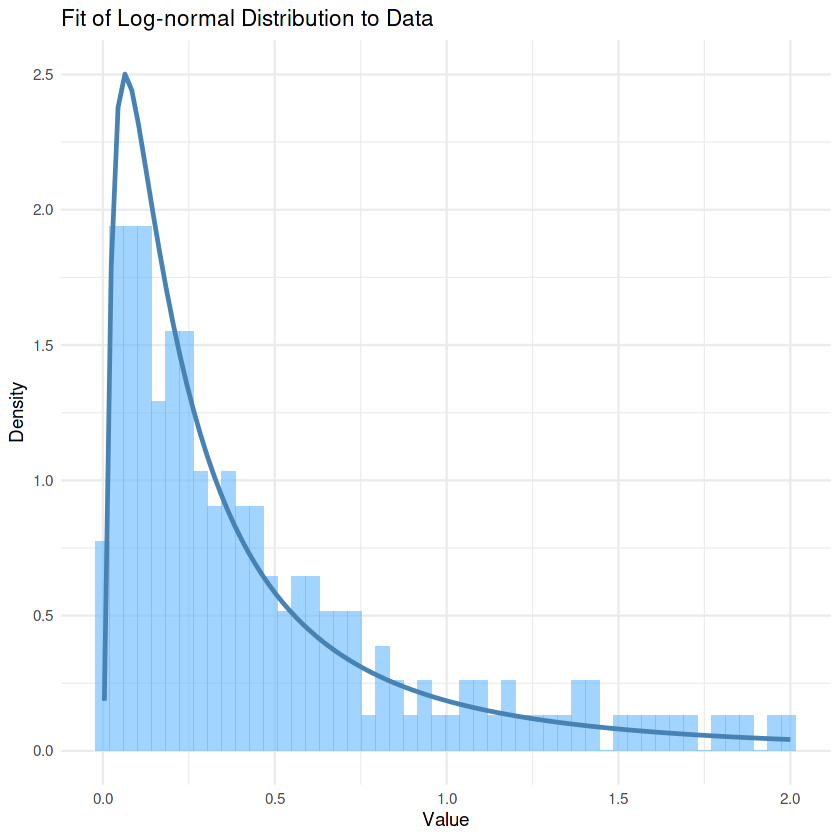

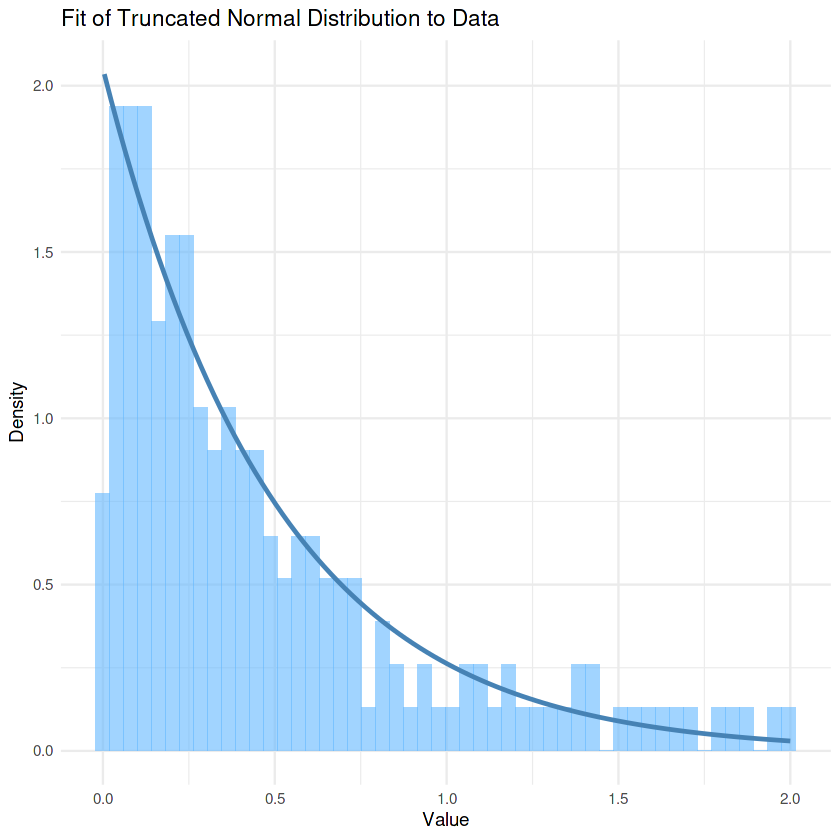

In [17]:
fit_lognorm_to_data(unique(data[model == "M4", WLM_calculated]))
fit_truncnorm_to_data(unique(data[model == "M4", WLM_calculated]))